In [56]:
import pandas as pd

In [57]:
import numpy as np

In [58]:
import matplotlib as plt
%matplotlib inline

In [59]:
dataset=pd.read_csv("E:/machine learning software/Datasets BITS/Data Set for Regression.csv") #IMPORTING DATA

In [60]:
dataset.head() #HEAD

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [61]:
dataset.tail() #TAIL

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365
550067,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [62]:
dataset.describe() #DESCRIBE

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [63]:
dataset.shape #SHAPE

(550068, 10)

In [64]:
dataset.dtypes #DTYPES

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

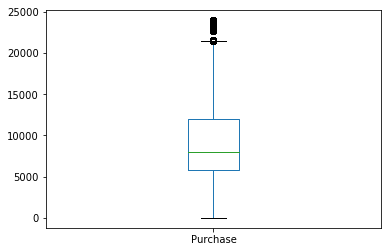

In [65]:
dataset.Purchase.plot(kind='box') # BOX PLOT

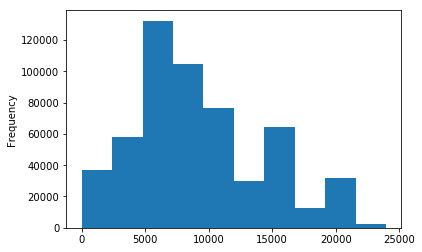

In [66]:
dataset.Purchase.plot(kind='hist') # HISTOGRAM

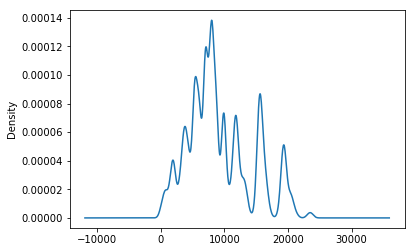

In [67]:
dataset.Purchase.plot(kind='density') #DENSITY CURVE

In [68]:
from scipy import stats as st

In [69]:
male=dataset[dataset.Gender=="M"]
female=dataset[dataset.Gender=="F"]

In [70]:
st.ttest_ind(male.Purchase,female.Purchase) # T-TEST

Ttest_indResult(statistic=44.837957934353966, pvalue=0.0)

In [71]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [72]:
group1=dataset[dataset.Age=='0-17']
group2=dataset[dataset.Age=='18-25']
group3=dataset[dataset.Age=='26-35']
group4=dataset[dataset.Age=='36-45']
group5=dataset[dataset.Age=='46-50']
group6=dataset[dataset.Age=='51-55']
group7=dataset[dataset.Age=='55+']

In [73]:
st.f_oneway(group1.Purchase,group2.Purchase,group3.Purchase,group4.Purchase,group5.Purchase,group6.Purchase,group7.Purchase)

# ANOVA TEST

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

In [74]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [75]:
st.chi2_contingency(pd.crosstab(dataset.City_Category,dataset.Purchase))  # chi SQUARED TEST

(41197.310957878792,
 8.0340323132469139e-71,
 36208,
 array([[ 27.1234102 ,  28.46615328,  25.5121185 , ...,   0.53709723,
           1.07419446,   0.80564585],
        [ 42.44652116,  44.54783409,  39.92494564, ...,   0.84052517,
           1.68105034,   1.26078776],
        [ 31.43006865,  32.98601264,  29.56293586, ...,   0.6223776 ,
           1.24475519,   0.9335664 ]]))

In [76]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [77]:
zero=dataset[dataset.Marital_Status==0]
one=dataset[dataset.Marital_Status==1]

In [78]:
st.ttest_ind(zero.Purchase,one.Purchase) # T-TEST

Ttest_indResult(statistic=0.34366980554405258, pvalue=0.73109475257583156)

In [79]:
#SINCE p-VALUE IS GREATER THAN 0.05, REJECT ALTERNATIVE AND CONSIDER THE NULL HYPOTHESIS
#THE DIFFERENCE IS NOT STATISTICALLY SIGNIFICANT

In [80]:
st.chi2_contingency(pd.crosstab(dataset.City_Category,dataset.Occupation))  # chi-SQUARED TEST

(19332.051033740743,
 0.0,
 40,
 array([[ 18701.1885076 ,  12736.18665329,   7140.17059709,   4739.883069  ,
          19418.21331181,   3270.11649469,   5466.30707476,  15880.08529854,
            415.17616004,   1689.43934204,   3472.33360239,   3111.40426275,
           8373.07729226,   2075.34370296,   7333.79414909,   3266.8939113 ,
           6813.34693165,  10753.49222278,   1778.32893388,   2272.18983835,
           9013.02864373],
        [ 29266.24594414,  19931.3733902 ,  11173.94162903,   7417.6346379 ,
          30388.347048  ,   5117.53750627,   8554.44493226,  24851.38748118,
            649.72595752,   2643.87192674,   5433.99523332,   4869.16231811,
          13103.36716006,   3247.78926242,  11476.95095334,   5112.49435524,
          10662.48206222,  16828.57471985,   2782.97884262,   3555.84173775,
          14104.85290182],
        [ 21670.56554826,  14758.43995651,   8273.88777388,   5492.4822931 ,
          22501.43964019,   3789.34599904,   6334.24799298,  18401.

In [81]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [82]:
st.chi2_contingency(pd.crosstab(dataset.Gender,dataset.Occupation))

(41664.592979596964,
 0.0,
 20,
 array([[ 17193.26909037,  11709.23891955,   6564.44238167,   4357.6955031 ,
          17852.47855174,   3006.43955475,   5025.546287  ,  14599.6378575 ,
            381.69956078,   1553.21600057,   3192.35143655,   2860.5246515 ,
           7697.93700233,   1908.00401405,   6742.45362573,   3003.47681559,
           6263.97125265,   9886.41365613,   1634.93822218,   2088.97799727,
           8286.28761899],
        [ 52444.73090963,  35716.76108045,  20023.55761833,  13292.3044969 ,
          54455.52144826,   9170.56044525,  15329.453713  ,  44533.3621425 ,
           1164.30043922,   4737.78399943,   9737.64856345,   8725.4753485 ,
          23481.06299767,   5819.99598595,  20566.54637427,   9161.52318441,
          19107.02874735,  30156.58634387,   4987.06177782,   6372.02200273,
          25275.71238101]]))

In [83]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

REGRESSION MODELS

In [84]:
dataset.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [85]:
dataset.isnull().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
dtype: int64

In [86]:
datanum=dataset.select_dtypes(include=[np.number])
datacat=dataset.select_dtypes(include=['object'])

In [87]:
datanum.isnull().sum().sort_values(ascending=False)

Product_Category_3    383247
Product_Category_2    173638
Purchase                   0
Product_Category_1         0
Marital_Status             0
Occupation                 0
dtype: int64

In [88]:
datanum.Product_Category_3.fillna(datanum.Product_Category_3.mean(),inplace=True)
datanum.Product_Category_2.fillna(datanum.Product_Category_2.mean(),inplace=True)  #CLEANING THE MISSING VALUES

C:\Users\saipavan\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [89]:
datanum.isnull().sum().sort_values(ascending=False)

Purchase              0
Product_Category_3    0
Product_Category_2    0
Product_Category_1    0
Marital_Status        0
Occupation            0
dtype: int64

In [90]:
datacat.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+


In [36]:
catcols=('Gender','Age','City_Category')

In [37]:
# LABEL ENCODING 

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [40]:
for col in catcols:
    datacat[col]=le.fit_transform(datacat[col].values) 

C:\Users\saipavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
datacat1=datacat.apply(le.fit_transform)

In [42]:
datadf=pd.concat([datacat1,datanum],axis=1)

In [43]:
datadf.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,2,10,0,3,9.842329,12.668243,8370
1,0,0,0,2,10,0,1,6.000000,14.000000,15200
2,0,0,0,2,10,0,12,9.842329,12.668243,1422
3,0,0,0,2,10,0,12,14.000000,12.668243,1057
4,1,6,2,4,16,0,8,9.842329,12.668243,7969


In [44]:
y=datadf.Purchase
X=datadf.drop('Purchase',axis=1)

MULTIPLE LINEAR REGRESSION

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
LinReg=LinearRegression()

In [47]:
LinRegmodel=LinReg.fit(X,y)

In [48]:
LinRegmodel.score(X,y)

0.12861411628482089

In [49]:
LinRegpredict=LinRegmodel.predict(X)

In [50]:
LinRegpredict

array([  9235.73526991,  10482.97799415,   5573.28991191, ...,
         2898.27036223,   3672.57927167,   3040.22600179])

In [51]:
Residuals=y-LinRegpredict

In [52]:
Residuals

0         -865.735270
1         4717.022006
2        -4151.289912
3        -4160.418254
4        -1205.851591
5         3721.180635
6         7410.162120
7         4988.176796
8         4905.770793
9          -75.884720
10       -3814.610172
11       -3989.884720
12       -1873.884720
13        4799.917814
14       -3887.085518
15       -7745.320223
16        2925.699502
17         203.964124
18         740.915868
19        7550.281543
20        -898.676319
21        1254.267142
22        1125.267142
23       -2635.732858
24         198.520547
25        7018.052926
26       -2785.378003
27       -2564.321465
28       -4764.371107
29        5965.768134
             ...     
550038   -2664.248772
550039   -2182.672135
550040   -2925.804427
550041   -3151.642738
550042   -3747.474182
550043   -3887.872377
550044   -3630.913616
550045   -2914.806913
550046   -2707.362772
550047   -3030.828277
550048   -3216.229450
550049   -3446.719753
550050   -3504.842317
550051   -2837.174652
550052   -

In [53]:
np.sqrt(np.mean(Residuals**2))  # RMSE

4688.9294403903323

DECISION TREE REGRESSION

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
DecTree=DecisionTreeRegressor()

In [56]:
DecTreemodel=DecTree.fit(X,y)

In [57]:
DecTreemodel.score(X,y)

0.79201124779965493

In [58]:
DecTreepredict=DecTreemodel.predict(X)

In [59]:
DecTreepredict

array([  8370. ,  17448. ,   1568.5, ...,    137. ,    365. ,    490. ])

In [60]:
DecResiduals=y-DecTreepredict

In [61]:
DecResiduals

0            0.000000
1        -2248.000000
2         -146.500000
3            0.000000
4         -424.038462
5          502.444444
6         -181.875000
7         -593.555556
8        -1110.142857
9         1292.147059
10        1658.000000
11       -2621.852941
12        -505.852941
13        1231.000000
14          42.500000
15        -376.000000
16           0.000000
17        1556.000000
18       -1980.500000
19        3822.000000
20        1318.428571
21        2783.862069
22        2654.862069
23       -1106.137931
24           0.000000
25         356.250000
26       -1567.078431
27         -27.705882
28       -1061.500000
29        3336.000000
             ...     
550038     205.000000
550039       0.000000
550040       6.500000
550041       0.000000
550042       0.000000
550043       0.000000
550044       0.000000
550045       0.000000
550046       0.000000
550047    -182.500000
550048     153.400000
550049     -11.666667
550050       0.000000
550051       0.000000
550052    

In [ ]:
np.sqrt(np.mean(DecResiduals**2))  #RMSE

2290.8062646413596

In [ ]:
pd.crosstab(dataset.Purchase,DecTreepredict)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF=RandomForestRegressor()

In [ ]:
RFmodel=RF.fit(X,y)

In [ ]:
RFmodel.score(X,y)

In [ ]:
RFpredict=RFmodel.predict(X)

In [ ]:
RFresidual=y-RFpredict

In [ ]:
RFresidual

In [ ]:
np.sqrt(np.mean(RFresidual**2))  #RMSE

In [ ]:
#GRADIENT BOOSTING REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB=GradientBoostingRegressor()

In [ ]:
GBmodel=GB.fit(X,y)

In [ ]:
GBmodel.score(X,y)

In [ ]:
GBpredict=GB.predict(X)

In [ ]:
GBresidual=y-GBpredict

In [ ]:
GBresidual

In [ ]:
np.sqrt(np.mean(GBresidual**2))  #RMSE

NEURAL NETWORKS

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
NN=MLPRegressor(activation='relu',solver='lbfgs')

In [ ]:
NNmodel=NN.fit(X,y)

In [ ]:
NNmodel.score(X,y)

In [ ]:
NNpredict=NNmodel.predict(X)

In [ ]:
NNresidual=y-NNpredict

In [ ]:
np.sqrt(np.mean(NNresidual**2))

SUPPORT VECTOR MACHINE REGRESSION

In [ ]:
from sklearn.svm import SVR

In [ ]:
SV1=SVR(kernel='linear')

In [ ]:
SVModel=SV1.fit(X,y)

In [ ]:
SVModel.score(X,y)

In [ ]:
SupVecPredict=SupVecModel.predict(X)

In [ ]:
pd.crosstab(y,SupVecPredict)

KNN REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN=KNeighborsRegressor()

In [ ]:
KNNmodel=KNN.fit(X,y)

In [ ]:
KNN.score(X,y)

In [ ]:
KNNpredict=KNNmodel.predict(X)

In [ ]:
KNNresidual=y-KNNpredict

In [ ]:
np.sqrt(np.mean(KNNresidual**2))

TASK 2

In [5]:
Dataset=pd.read_csv("E:/machine learning software/Datasets BITS/Dataset for Classification.csv") #IMPORTING DATA

In [6]:
Dataset.head() # HEAD

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,4,1,6,3,3,2,2,2,2


In [7]:
Dataset.tail() #TAIL

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,3,1,0,6,3,4,4,3,1,2


In [11]:
Dataset.describe() # DESCRIBE

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
Dataset.shape # SHAPE

(1470, 33)

In [9]:
Dataset.dtypes # DTYPES

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [10]:
st.chi2_contingency(pd.crosstab(Dataset.Gender,Dataset.Attrition))  # chi-SQUARED TEST 

(1.1169671241970975, 0.29057244902890855, 1, array([[ 493.2,   94.8],
        [ 739.8,  142.2]]))

In [11]:
#SINCE p-VALUE IS GREATER THAN 0.05, REJECT ALTERNATIVE AND CONSIDER THE NULL HYPOTHESIS
#THE DIFFERENCE IS NOT STATISTICALLY SIGNIFICANT

In [12]:
st.chi2_contingency(pd.crosstab(Dataset.EducationField,Dataset.Attrition))  # chi-SQUARED TEST 

(16.024674119585427,
 0.0067739801390252121,
 5,
 array([[  22.64693878,    4.35306122],
        [ 508.29795918,   97.70204082],
        [ 133.36530612,   25.63469388],
        [ 389.19183673,   74.80816327],
        [  68.77959184,   13.22040816],
        [ 110.71836735,   21.28163265]]))

In [13]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [14]:
m=Dataset[Dataset.Gender=="Male"]
f=Dataset[Dataset.Gender=="Female"]

In [15]:
st.ttest_ind(m.MonthlyIncome,f.MonthlyIncome)  # T-TEST

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)

In [16]:
#SINCE p-VALUE IS GREATER THAN 0.05, REJECT ALTERNATIVE AND CONSIDER THE NULL HYPOTHESIS
#THE DIFFERENCE IS NOT STATISTICALLY SIGNIFICANT

In [17]:
single=Dataset[Dataset.MaritalStatus=='Single']
married=Dataset[Dataset.MaritalStatus=='Married']
divorced=Dataset[Dataset.MaritalStatus=='Divorced']

In [18]:
st.f_oneway(single.MonthlyIncome,married.MonthlyIncome,divorced.MonthlyIncome)  # ANOVA TEST

F_onewayResult(statistic=5.9047533237590537, pvalue=0.0027916759566845961)

In [19]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [20]:
yes=Dataset[Dataset.Attrition=='Yes']
no=Dataset[Dataset.Attrition=='No']

In [21]:
st.ttest_ind(yes.DistanceFromHome,no.DistanceFromHome)  # T-TEST

Ttest_indResult(statistic=2.9947080982651251, pvalue=0.0027930600802134266)

In [22]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [23]:
st.ttest_ind(m.YearsInCurrentRole,f.YearsInCurrentRole)  # T-TEST

Ttest_indResult(statistic=-1.5907588008772968, pvalue=0.11187917635884875)

In [24]:
#SINCE p-VALUE IS GREATER THAN 0.05, REJECT ALTERNATIVE AND CONSIDER THE NULL HYPOTHESIS
#THE DIFFERENCE IS NOT STATISTICALLY SIGNIFICANT

In [25]:
st.f_oneway(single.YearsInCurrentRole,married.YearsInCurrentRole,divorced.YearsInCurrentRole)  # ANOVA TEST

F_onewayResult(statistic=5.6772575105521268, pvalue=0.0034985756003226682)

In [26]:
#SINCE p-VALUE IS LESS THAN 0.05, REJECT NULL AND CONSIDER THE ALTERNATIVE HYPOTHESIS
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [27]:
Datacat=Dataset.select_dtypes(include=['object'])
Datanum=Dataset.select_dtypes(include=[np.number])

In [28]:
Datacat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [29]:
Catcols=('Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime')

In [30]:
# LABEL ENCODING

In [34]:
for col in Catcols:
    Datacat[col]=le.fit_transform(Datacat[col].values) 

C:\Users\saipavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
Datacat1=Datacat.apply(le.fit_transform)

In [36]:
Datadf=pd.concat([Datacat1,Datanum],axis=1)

In [37]:
Datadf.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,1,41,1102,...,3,1,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,49,279,...,4,4,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,1,37,1373,...,3,2,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,1,33,1392,...,3,3,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,27,591,...,3,4,1,6,3,3,2,2,2,2


In [38]:
y=Datadf.Attrition
X=Datadf.drop('Attrition',axis=1)

BINARY LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
LogReg=LogisticRegression()

In [47]:
LogRegmodel=LogReg.fit(X,y)

In [48]:
LogRegmodel.score(X,y)

0.87210884353741491

In [49]:
LogRegpredict=LogRegmodel.predict(X)

In [50]:
LogRegpredict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
pd.crosstab(Datadf.Attrition,LogRegpredict)

col_0,0,1
Attrition,,
0,1204,29
1,159,78


In [54]:
 (1204+78)/(1204+78+159+29)

0.8721088435374149

In [ ]:
# Accuracy is 87.21%

DECISION TREE 

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
DecTree=DecisionTreeClassifier()

In [57]:
DecTreeModel=DecTree.fit(X,y)

In [58]:
DecTreeModel.score(X,y)

1.0

In [59]:
DecTreePredict=DecTreeModel.predict(X)

In [60]:
DecTreePredict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [61]:
pd.crosstab(Datadf.Attrition,DecTreePredict)

col_0,0,1
Attrition,,
0,1233,0
1,0,237


In [62]:
# Accuracy is 100%

RANDOM FOREST CLASSIFIER

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RF1=RandomForestClassifier(n_estimators=1000)

In [65]:
RFModel=RF1.fit(X,y)

In [66]:
RFModel.score(X,y)

1.0

In [68]:
RFPredict=RFModel.predict(X)

In [70]:
RFresidual=y-RFPredict

In [71]:
pd.crosstab(Datadf.Attrition,RFPredict)

col_0,0,1
Attrition,,
0,1233,0
1,0,237


In [72]:
# Accuracy is 100%

GRADIENT BOOSTING CLASSIFIER

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
GB1=GradientBoostingClassifier(n_estimators=1000)

In [75]:
GBModel=GB1.fit(X,y)

In [76]:
GBModel.score(X,y)

1.0

In [77]:
GBPredict=GBModel.predict(X)

In [78]:
GBResidual=y-GBPredict

In [79]:
np.sqrt(np.mean(GBResidual**2))

0.0

In [80]:
pd.crosstab(Datadf.Attrition,GBPredict)

col_0,0,1
Attrition,,
0,1233,0
1,0,237


In [ ]:
# Accuracy is 100%

NEURAL NETWORKS

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
NN1=MLPClassifier(activation='logistic',hidden_layer_sizes=(200,100,))

In [84]:
NNModel=NN1.fit(X,y)

In [85]:
NNModel.score(X,y)

0.83877551020408159

In [90]:
NNPredict=NNModel.predict(X)

In [91]:
pd.crosstab(Datadf.Attrition,NNPredict)

col_0,0
Attrition,
0,1233
1,237


SUPPORT VECTOR MACHINE CLASSIFIER

In [39]:
from sklearn.svm import SVC

In [40]:
SupportVec=SVC(kernel='linear')

In [41]:
SupVecmodel=SupportVec.fit(X,y)

In [42]:
SupVecmodel.score(X,y)

0.84965986394557824

In [43]:
SupVecmodel

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
SupVecpredict=SupVecmodel.predict(X)

In [45]:
pd.crosstab(y,SupVecpredict)

col_0,0,1
Attrition,,
0,1214,19
1,202,35


In [46]:
(1214+35)/(1214+35+19+202)

0.8496598639455782

In [47]:
# Accuracy is 84.965%

KNN CLASSIFIER

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
KN=KNeighborsClassifier()

In [50]:
KNmodel=KN.fit(X,y)

In [51]:
KNmodel.score(X,y)

0.85442176870748299

In [52]:
KNpredict=KNmodel.predict(X)

In [53]:
pd.crosstab(y,KNpredict)

col_0,0,1
Attrition,,
0,1213,20
1,194,43


In [54]:
(1213+43)/(1213+43+20+194)

0.854421768707483

In [55]:
# Accuracy is 85.44%